# SML Pratical

Music Genre Classification


In [11]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset

In [12]:
# Load the training data and the test inputs
X_train = pd.read_csv('X_train.csv', index_col = 0, header=[0, 1, 2]) # inputs of the training set
y_train = pd.read_csv('y_train.csv', index_col = 0).squeeze('columns') # outputs of the training set
X_test = pd.read_csv('X_test.csv', index_col = 0, header=[0, 1, 2]) # inputs of the test set

In [5]:
# total number of rows and columns(attributes)
n, p = np.shape(X_train)
# Entries (i,j) correspond to the j'th dimension of the observation i
X_train


feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
Id                                                                         
0            -0.266585 -0.984668 -0.729823 -0.895122  2.138628  0.935209   
1            -0.180061  0.260884 -0.069373  0.208734 -0.078855 -0.577818   
2            -0.692900  0.356662  0.062617  0.248280  3.470037  0.166613   
3             0.243339  0.214182 -0.049026  1.456255 -0.360826 -0.875256   
4            -0.968576  0.309255  0.223164  0.160960  0.919838 -0.111985   
...                ...       ...       ...       ...       ...       ...   
5995          0.503490 -0.540720 -0.690117 -0.107338 -0.647856 -0.681969   
5996         -0.600597  0.406386 -0.748409 -0.316157 -0.507428 -0.054214   
5997         -1.014298 -0.950744  0.618304  0.204298 -0.788411 -0.794254   
5998         -0.002938  0.646034 -0.732819  1.205990 -0.898733 -0.684953   
5999         -0.881917 -0.615638  0.891155  4.850262 -0.349280 -1.010980   

feature                                             ...   tonnetz            \
statistics                                          ...       std             
number            07        08        09        10  ...        04        05   
Id                                                  ...                       
0           0.104089 -0.698659 -0.736408 -0.334376  ...  0.065003  0.016522   
1           0.583788  0.143781  0.291556  0.007314  ...  0.087692  0.016355   
2           0.823874  0.181112  0.551939  0.357985  ...  0.132387  0.025847   
3          -0.770200  0.315500  0.789956  0.448319  ...  0.071478  0.019166   
4          -1.012521 -0.665692 -0.316646 -0.264381  ...  0.106220  0.023536   
...              ...       ...       ...       ...  ...       ...       ...   
5995       -0.246245 -0.546552  0.062783  0.070393  ...  0.084929  0.017250   
5996       -0.476804 -0.373120 -0.930158 -1.080690  ...  0.075407  0.014998   
5997       -0.586847  0.099172 -0.313476 -0.523417  ...  0.138591  0.024969   
5998        0.134642 -0.374792 -0.019524 -1.016032  ...  0.137695  0.030371   
5999       -0.577905 -0.046604 -0.828026 -0.457468  ...  0.175120  0.039703   

feature                      zcr                                          \
statistics              kurtosis       max      mean    median       min   
number            06          01        01        01        01        01   
Id                                                                         
0           0.015776    5.743597  0.307617  0.051370  0.042480  0.002441   
1           0.016605   64.870987  0.812988  0.082784  0.069824  0.003906   
2           0.023922   34.251705  0.850098  0.058200  0.036621  0.010254   
3           0.025535    1.364990  0.342285  0.081713  0.075195  0.000000   
4           0.019742    3.589230  0.322266  0.073736  0.069336  0.004395   
...              ...         ...       ...       ...       ...       ...   
5995        0.020335    4.868783  0.668945  0.076452  0.044434  0.001465   
5996        0.020683    7.893681  0.584961  0.076210  0.048340  0.000000   
5997        0.023658   27.257378  0.373047  0.042598  0.037598  0.000000   
5998        0.029970  431.200500  0.384277  0.025731  0.025391  0.008301   
5999        0.025094   13.567758  0.233398  0.047689  0.044922  0.015625   

feature                          
statistics       skew       std  
number             01        01  
Id                               
0            1.976972  0.034533  
1            7.374503  0.074870  
2            5.927942  0.117603  
3            1.100437  0.041754  
4            1.210593  0.036459  
...               ...       ...  
5995         2.045856  0.084214  
5996         2.561808  0.073010  
5997         3.778109  0.027813  
5998        10.260160  0.006870  
5999         2.553229  0.018049  

[6000 rows x 518 colu

In [6]:
print(f"unique features: {X_train.columns.get_level_values('feature').unique().tolist()}")
print(f"statistics used: {X_train.columns.get_level_values('statistics').unique().tolist()}")

unique features: ['chroma_cens', 'chroma_cqt', 'chroma_stft', 'mfcc', 'rmse', 'spectral_bandwidth', 'spectral_centroid', 'spectral_contrast', 'spectral_rolloff', 'tonnetz', 'zcr']
statistics used: ['kurtosis', 'max', 'mean', 'median', 'min', 'skew', 'std']


In [ ]:
#  (may not be useful) plot correlations for each set of statistics

statistics = X_train.columns.get_level_values('statistics').unique()

for statistic in statistics:
    # obtain the columns for each feature
    cols = [col for col in X_train if col[1] == statistic]
    # find the correlation matrix
    corr = X_train[cols].corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(16, 11))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

    plt.title(f'Correlation Heatmap (for {statistic})', fontsize = 25)
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)

In [10]:
#y_train contains the true class:  Electronic, Experimental, Folk, Hip-Hop, Instrumental, International, Pop or Rock
classes = np.unique(y_train)
classes

array(['Electronic', 'Experimental', 'Folk', 'Hip-Hop', 'Instrumental',
       'International', 'Pop', 'Rock'], dtype=object)

In [11]:
# X_test is the array of test inputs, of the same format as X_train. The objective is to predict the class (Electronic, Experimental, Folk, Hip-Hop, Instrumental, International, Pop or Rock) of the output
np.shape(X_test)

(2000, 518)

## Pre-processing and dimension reduction

In [13]:
from sklearn import preprocessing

### normalise the training set and test set together ###
X = pd.concat([X_train, X_test], ignore_index=True)
scaler = preprocessing.MinMaxScaler()
X_scaled = pd.DataFrame(data=scaler.fit_transform(X), columns=X.columns)
X_train_scaled = X_scaled.iloc[:6000,:]
X_test_scaled = X_scaled.iloc[6000:, :]

In [14]:
### use PCA to reduce the dimension ###
from sklearn.decomposition import PCA

pca = PCA(n_components=p)
# find the principal compoennts
pc = pd.DataFrame(data = pca.fit_transform(X_train_scaled), columns = [f'PC {i}' for i in range(1, p+1)])

# concatenate labels 
Df_PCA = pd.concat([pc, y_train], axis=1)

explained_variances = pca.explained_variance_ratio_


Text(0, 0.5, 'ratio of explained variance')

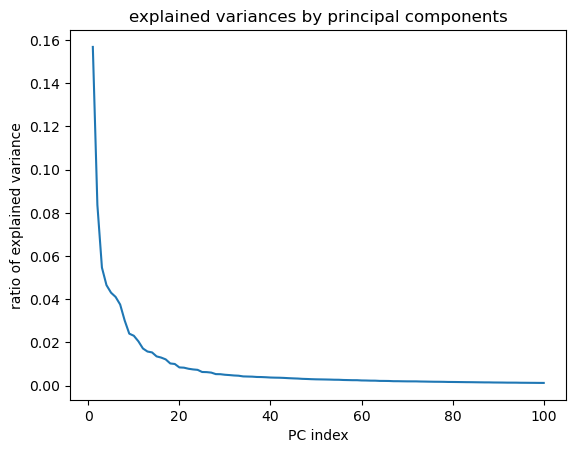

In [15]:
plt.plot(range(1, 101), explained_variances[:100])
plt.title('explained variances by principal components')
plt.xlabel('PC index')
plt.ylabel('ratio of explained variance')


In [16]:
n_PCA = 20

elbow method: take around 20 PCs as features

Text(0.5, 0, 'second principal component')

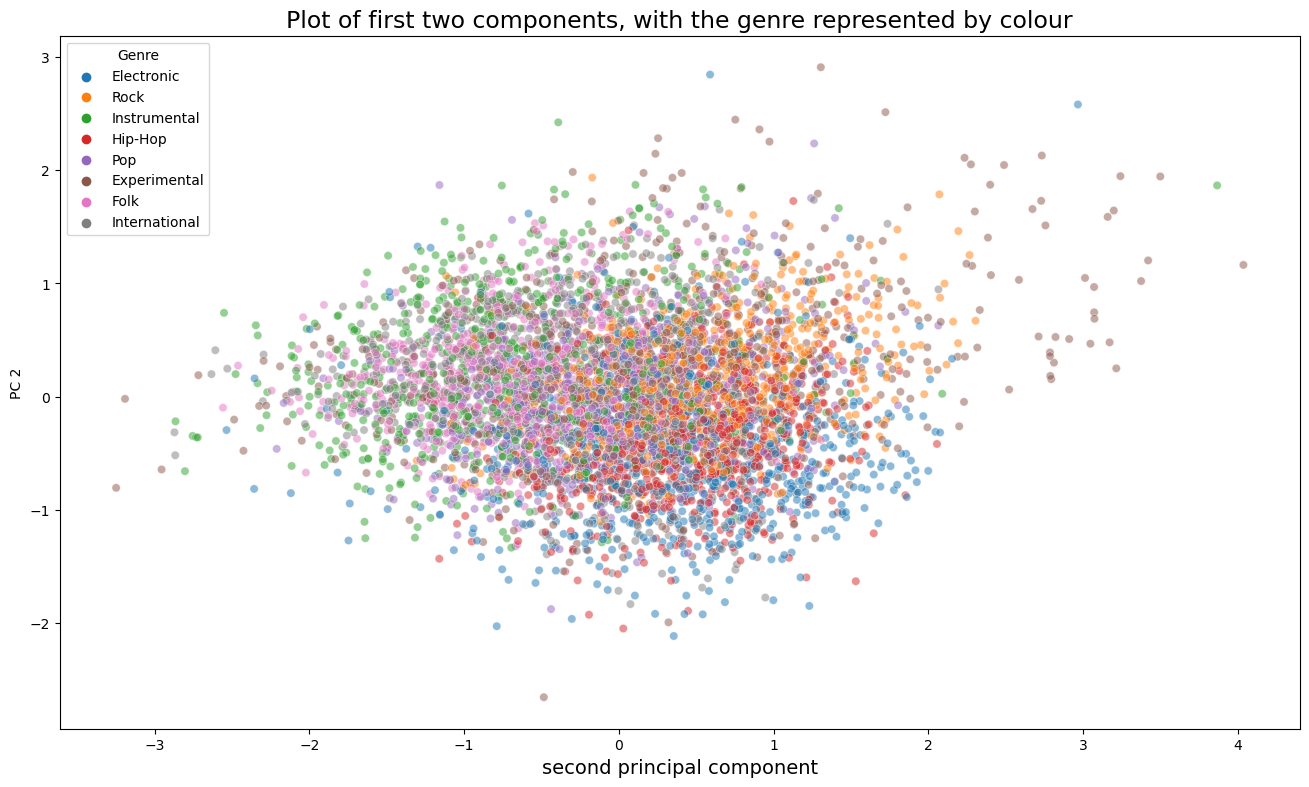

In [16]:
# plot the first two principal components (useless plot, messy)

plt.figure(figsize = (16, 9))
sns.scatterplot(x='PC 1', y='PC 2', hue=Df_PCA['Genre'], data=Df_PCA.iloc[:, :2], alpha=0.5)


plt.title('Plot of first two components, with the genre represented by colour', fontsize=17)
plt.xlabel('first principal component', fontsize=14)
plt.xlabel('second principal component', fontsize=14)

## Training Models

In [17]:
### Try Various Machien Learning Algorithms ###
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [18]:
X_t, X_val, y_t, y_val = train_test_split(X_train_scaled, y_train, test_size=0.3, random_state=1)

## use PCA to reduce dimension. n = 20
pca = PCA(n_components=n_PCA)
X_t_PC = pd.DataFrame(data = pca.fit_transform(X_t), columns = [f'PC {i}' for i in range(1, n_PCA+1)])
pca = PCA(n_components=n_PCA)
X_val_PC = pd.DataFrame(data = pca.fit_transform(X_val), columns = [f'PC {i}' for i in range(1, n_PCA+1)])

In [22]:
def model_PCA(model, name):
    model.fit(X_t_PC, y_t)
    y_pred = model.predict(X_val_PC)
    print('Validation Accuracy', name, ':', round(accuracy_score(y_val, y_pred), 5), '\n')

In [23]:
## casual trainings with no tuning
nb =  GaussianNB()
sgd = SGDClassifier(max_iter=4000)
tree = DecisionTreeClassifier()
forest = RandomForestClassifier(n_estimators=1000, max_depth=20)
svm = SVC(decision_function_shape="ovo")
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(200, 10), random_state=1)

algorithms = {
    'naive_Bayes': nb,
    'SGD' : sgd,
    'Decision_tree': tree,
    'random_forest': forest,
    'SVM': svm,
    'logistic_regression': lg,
    'neural network': nn
}

for name, algorithm in algorithms.items():
    model_PCA(algorithm, name)

Validation Accuracy naive_Bayes : 0.26722 

Validation Accuracy SGD : 0.21167 

Validation Accuracy Decision_tree : 0.17556 

Validation Accuracy random_forest : 0.22944 

Validation Accuracy SVM : 0.23278 

Validation Accuracy logistic_regression : 0.20722 

Validation Accuracy neural network : 0.19056 



/Users/linyuhang/mambaforge/envs/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


## LDA

In [33]:
### Use LDA to reduce dimension instead ###
LDAclassifier = LinearDiscriminantAnalysis(n_components=7) # 7 classes in total 
LDAclassifier.fit(X_t, y_t)
y_pred = LDAclassifier.predict(X_val)
print('Validation Accuracy', ':', round(accuracy_score(y_val, y_pred), 5), '\n')

Validation Accuracy : 0.54833 



In [34]:
def model_LDA(model, name):
    """training based on LDA for dimension-reduction"""
    # obtain LDA components for other algorithms
    LDA = LinearDiscriminantAnalysis()
    LDA.fit(X_t, y_t)
    X_t_LDA = LDA.transform(X_t)
    X_val_LDA = LDA.transform(X_val)      
    model.fit(X_t_LDA, y_t)
    y_pred = model.predict(X_val_LDA)
    print('Validation Accuracy', name, ':', round(accuracy_score(y_val, y_pred), 5), '\n')

In [35]:
for name, algorithm in algorithms.items():
    model_LDA(algorithm, name)

Validation Accuracy naive_Bayes : 0.55833 

Validation Accuracy SGD : 0.51944 

Validation Accuracy Decision_tree : 0.45222 

Validation Accuracy random_forest : 0.55667 

Validation Accuracy SVM : 0.55556 

Validation Accuracy logistic_regression : 0.54611 

Validation Accuracy neural network : 0.50833 



/Users/linyuhang/mambaforge/envs/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Conclusion: LDA is better than PCA for dimension reduction

## Export in csv format 

In [ ]:
# Export the predictions on the test data in csv format
prediction = pd.DataFrame(y_pred, columns=['Genre'])
prediction.index.name='Id'
prediction.to_csv('myprediction.csv') # export to csv file

# The csv file should be of the form
#Id, Genre
#0, Folk
#1, Hip-Hop
#2, International
#...
#1998, Experimental
#1999, Pop